In [2]:
import pandas as pd
import numpy as np

In [4]:
# Load previously saved files
X_train = pd.read_csv('data/training/X_train_processed.csv')
y_train = pd.read_csv('data/training/y_train_processed.csv')
# Then combine them
df = X_train.copy()
df['loan_status'] = y_train.values
# Add a unique ID column (starting at 1)
df.insert(0, 'id', range(1, len(df) + 1))



In [5]:
print(X_train.shape)
print(y_train.shape)
print(df.shape)


(179457, 40)
(179457, 1)
(179457, 42)


In [111]:
import pandas as pd
from IPython.display import display

# Ensure all columns are shown
pd.set_option('display.max_columns', None)

# Display the first row with all its columns
display(df.head(1))


,id,loan_amount_k,applicant_income_k,co_applicant_status,loan_to_income_ratio,loan_type_Conventional,loan_type_FHA-insured,loan_type_FSA/RHS-guaranteed,loan_type_VA-guaranteed,purpose_Home improvement,purpose_Home purchase,purpose_Refinancing,property_type_Manufactured housing,property_type_Multifamily dwelling,property_type_One-to-four family dwelling (other than manufactured housing),lien_status_Not secured by a lien,lien_status_Secured by a first lien,lien_status_Secured by a subordinate lien,owner_occupancy_Not applicable,owner_occupancy_Not owner-occupied as a principal dwelling,owner_occupancy_Owner-occupied as a principal dwelling,applicant_race_American Indian or Alaska Native,applicant_race_Asian,applicant_race_Black or African American,applicant_race_Native Hawaiian or Other Pacific Islander,applicant_race_White,applicant_ethnicity_Hispanic or Latino,applicant_ethnicity_Not Hispanic or Latino,applicant_ethnicity_information not provided,applicant_sex_Female,applicant_sex_Male,region_Capital Region,region_Central NY,region_Finger Lakes,region_Hudson Valley,region_Long Island,region_Mohawk Valley,region_NYC,region_North Country,region_Southern Tier,region_Western NY,loan_status
0,1,217,83.0,0,2.614458,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1


In [112]:
unique_values = {col: df[col].unique() for col in df.columns}
print(unique_values)

{'id': array([     1,      2,      3, ..., 179455, 179456, 179457]), 'loan_amount_k': array([ 217,    5,  103, ..., 3860, 2158, 2912]), 'applicant_income_k': array([  83.,   27.,   48., ..., 1076.,  931., 4492.]), 'co_applicant_status': array([0, 1, 3, 2]), 'loan_to_income_ratio': array([2.61445783, 0.18518519, 2.14583333, ..., 1.51476793, 1.78645833,
       2.72952854]), 'loan_type_Conventional': array([1, 0]), 'loan_type_FHA-insured': array([0, 1]), 'loan_type_FSA/RHS-guaranteed': array([0, 1]), 'loan_type_VA-guaranteed': array([0, 1]), 'purpose_Home improvement': array([0, 1]), 'purpose_Home purchase': array([0, 1]), 'purpose_Refinancing': array([1, 0]), 'property_type_Manufactured housing': array([0, 1]), 'property_type_Multifamily dwelling': array([0, 1]), 'property_type_One-to-four family dwelling (other than manufactured housing)': array([1, 0]), 'lien_status_Not secured by a lien': array([0, 1]), 'lien_status_Secured by a first lien': array([1, 0]), 'lien_status_Secured by a su

In [113]:
exclude_cols = ['loan_amount_k', 'applicant_income_k', 'loan_to_income_ratio','id']

# Get unique values for each column except the excluded ones
unique_values = {col: df[col].unique().tolist() for col in df.columns if col not in exclude_cols}

print(unique_values)

{'co_applicant_status': [0, 1, 3, 2], 'loan_type_Conventional': [1, 0], 'loan_type_FHA-insured': [0, 1], 'loan_type_FSA/RHS-guaranteed': [0, 1], 'loan_type_VA-guaranteed': [0, 1], 'purpose_Home improvement': [0, 1], 'purpose_Home purchase': [0, 1], 'purpose_Refinancing': [1, 0], 'property_type_Manufactured housing': [0, 1], 'property_type_Multifamily dwelling': [0, 1], 'property_type_One-to-four family dwelling (other than manufactured housing)': [1, 0], 'lien_status_Not secured by a lien': [0, 1], 'lien_status_Secured by a first lien': [1, 0], 'lien_status_Secured by a subordinate lien': [0, 1], 'owner_occupancy_Not applicable': [0, 1], 'owner_occupancy_Not owner-occupied as a principal dwelling': [0, 1], 'owner_occupancy_Owner-occupied as a principal dwelling': [1, 0], 'applicant_race_American Indian or Alaska Native': [0, 1], 'applicant_race_Asian': [0, 1], 'applicant_race_Black or African American': [0, 1], 'applicant_race_Native Hawaiian or Other Pacific Islander': [0, 1], 'applic

In [114]:
from aif360.explainers import Explainer
from aif360.metrics import Metric


class MetricTextExplainer(Explainer):
    """Class for explaining metric values with text.

    These briefly explain what a metric is and/or how it is calculated unless it
    is obvious (e.g. accuracy) and print the value.

    This class contains text explanations for all metric values regardless of
    which subclass they appear in. This will raise an error if the metric does
    not apply (e.g. calling `true_positive_rate` if
    `type(metric) == DatasetMetric`).
    """

    def __init__(self, metric):
        """Initialize a `MetricExplainer` object.

        Args:
            metric (Metric): The metric to be explained.
        """
        if isinstance(metric, Metric):
            self.metric = metric
        else:
            raise TypeError("metric must be a Metric.")

    def accuracy(self, privileged=None):
        if privileged is None:
            return "Classification accuracy (ACC): {}".format(
                self.metric.accuracy(privileged=privileged))
        return "Classification accuracy on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.accuracy(privileged=privileged))

    def average_abs_odds_difference(self):
        return ("Average absolute odds difference (average of abs(TPR "
                "difference) and abs(FPR difference)): {}".format(
                    self.metric.average_abs_odds_difference()))

    def average_odds_difference(self):
        return ("Average odds difference (average of TPR difference and FPR "
                "difference, 0 = equality of odds): {}".format(
                    self.metric.average_odds_difference()))

    def between_all_groups_coefficient_of_variation(self):
        return "Between-group coefficient of variation: {}".format(
            self.metric.between_all_groups_coefficient_of_variation())

    def between_all_groups_generalized_entropy_index(self, alpha=2):
        return "Between-group generalized entropy index: {}".format(
            self.metric.between_all_groups_generalized_entropy_index(alpha=alpha))

    def between_all_groups_theil_index(self):
        return "Between-group Theil index: {}".format(
            self.metric.between_all_groups_theil_index())

    def between_group_coefficient_of_variation(self):
        return "Between-group coefficient of variation: {}".format(
            self.metric.between_group_coefficient_of_variation())

    def between_group_generalized_entropy_index(self, alpha=2):
        return "Between-group generalized entropy index: {}".format(
            self.metric.between_group_generalized_entropy_index(alpha=alpha))

    def between_group_theil_index(self):
        return "Between-group Theil index: {}".format(
            self.metric.between_group_theil_index())

    def coefficient_of_variation(self):
        return "Coefficient of variation: {}".format(
            self.metric.coefficient_of_variation())

    def consistency(self, n_neighbors=5):
        return "Consistency (Zemel, et al. 2013): {}".format(
            self.metric.consistency(n_neighbors=n_neighbors))

    def disparate_impact(self):
        return ("Disparate impact (probability of favorable outcome for "
                "unprivileged instances / probability of favorable outcome for "
                "privileged instances): {}".format(
                    self.metric.disparate_impact()))

    def error_rate(self, privileged=None):
        if privileged is None:
            return "Error rate (ERR = 1 - ACC): {}".format(
                self.metric.error_rate(privileged=privileged))
        return "Error rate on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.error_rate(privileged))

    def error_rate_difference(self):
        return ("Error rate difference (error rate on unprivileged instances - "
                "error rate on privileged instances): {}".format(
                    self.metric.error_rate_difference()))

    def error_rate_ratio(self):
        return ("Error rate ratio (error rate on unprivileged instances / "
                "error rate on privileged instances): {}".format(
                    self.metric.error_rate_ratio()))

    def false_discovery_rate(self, privileged=None):
        if privileged is None:
            return "False discovery rate (FDR = FP / (FP + TP)): {}".format(
                self.metric.false_discovery_rate(privileged=privileged))
        return "False discovery rate on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.false_discovery_rate(privileged=privileged))

    def false_discovery_rate_difference(self):
        return ("False discovery rate difference (false discovery rate on "
                "unprivileged instances - false discovery rate on privileged "
                "instances): {}".format(
                    self.metric.false_discovery_rate_difference()))

    def false_discovery_rate_ratio(self):
        return ("False discovery rate ratio (false discovery rate on "
                "unprivileged instances - false discovery rate on privileged "
                "instances): {}".format(
                    self.metric.false_discovery_rate_ratio()))

    def false_negative_rate(self, privileged=None):
        if privileged is None:
            return "False negative rate (FNR = FN / (TP + FN)): {}".format(
                self.metric.false_negative_rate(privileged=privileged))
        return "False negative rate on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.false_negative_rate(privileged=privileged))

    def false_negative_rate_difference(self):
        return ("False negative rate difference (false negative rate on "
                "unprivileged instances - false negative rate on privileged "
                "instances): {}".format(
                    self.metric.false_negative_rate_difference()))

    def false_negative_rate_ratio(self):
        return ("False negative rate ratio (false negative rate on "
                "unprivileged instances / false negative rate on privileged "
                "instances): {}".format(
                    self.metric.false_negative_rate_ratio()))

    def false_omission_rate(self, privileged=None):
        if privileged is None:
            return "False omission rate (FOR = FN / (FN + TN)): {}".format(
                self.metric.false_omission_rate(privileged=privileged))
        return "False omission rate on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.false_omission_rate(privileged=privileged))

    def falses_omission_rate_difference(self):
        return ("False omission rate difference (falses omission rate on "
                "unprivileged instances - falses omission rate on privileged "
                "instances): {}".format(
                    self.metric.falses_omission_rate_difference()))

    def false_omission_rate_ratio(self):
        return ("False omission rate ratio (false omission rate on "
                "unprivileged instances - false omission rate on privileged "
                "instances): {}".format(
                    self.metric.false_omission_rate_ratio()))

    def false_positive_rate(self, privileged=None):
        if privileged is None:
            return "False positive rate (FPR = FP / (FP + TN)): {}".format(
                self.metric.false_positive_rate(privileged=privileged))
        return "False positive rate on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.false_positive_rate(privileged=privileged))

    def false_positive_rate_difference(self):
        return ("False positive rate difference (false positive rate on "
                "unprivileged instances - false positive rate on privileged "
                "instances): {}".format(
                    self.metric.false_positive_rate_difference()))

    def false_positive_rate_ratio(self):
        return ("False positive rate ratio (false positive rate on "
                "unprivileged instances / false positive rate on privileged "
                "instances): {}".format(
                    self.metric.false_positive_rate_ratio()))

    def generalized_entropy_index(self, alpha=2):
        return "Generalized entropy index (GE(alpha)): {}".format(
            self.metric.generalized_entropy_index(alpha=alpha))

    def mean_difference(self):
        return ("Mean difference (mean label value on unprivileged instances - "
                "mean label value on privileged instances): {}".format(
                    self.metric.mean_difference()))

    def negative_predictive_value(self, privileged=None):
        if privileged is None:
            return "Negative predictive value (NPV = TN / (TN + FN)): {}".format(
                self.metric.negative_predictive_value(privileged=privileged))
        return "Negative predictive value on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.negative_predictive_value(privileged=privileged))

    def num_false_negatives(self, privileged=None):
        if privileged is None:
            return "Number of false negative instances (FN): {}".format(
                self.metric.num_false_negatives(privileged=privileged))
        return "Number of {} false negative instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_false_negatives(privileged=privileged))

    def num_false_positives(self, privileged=None):
        if privileged is None:
            return "Number of false positive instances (FP): {}".format(
                self.metric.num_false_positives(privileged=privileged))
        return "Number of {} false positive instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_false_positives(privileged=privileged))

    def num_instances(self, privileged=None):
        if privileged is None:
            return "Number of instances: {}".format(
                self.metric.num_instances(privileged=privileged))
        return "Number of {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_instances(privileged=privileged))

    def num_negatives(self, privileged=None):
        if privileged is None:
            return "Number of negative-outcome instances: {}".format(
                self.metric.num_negatives(privileged=privileged))
        return "Number of {} negative-outcome instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_negatives(privileged=privileged))

    def num_positives(self, privileged=None):
        if privileged is None:
            return "Number of positive-outcome instances: {}".format(
                self.metric.num_positives(privileged=privileged))
        return "Number of {} positive-outcome instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_positives(privileged=privileged))

    def num_pred_negatives(self, privileged=None):
        if privileged is None:
            return "Number of negative-outcome instances predicted: {}".format(
                self.metric.num_pred_negatives(privileged=privileged))
        return "Number of {} negative-outcome instances predicted: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_pred_negatives(privileged=privileged))

    def num_pred_positives(self, privileged=None):
        if privileged is None:
            return "Number of positive-outcome instances predicted: {}".format(
                self.metric.num_pred_positives(privileged=privileged))
        return "Number of {} positive-outcome instances predicted: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_pred_positives(privileged=privileged))

    def num_true_negatives(self, privileged=None):
        if privileged is None:
            return "Number of true negative instances (TN): {}".format(
                self.metric.num_true_negatives(privileged=privileged))
        return "Number of {} true negative instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_true_negatives(privileged=privileged))

    def num_true_positives(self, privileged=None):
        if privileged is None:
            return "Number of true positive instances (TP): {}".format(
                self.metric.num_true_positives(privileged=privileged))
        return "Number of {} true positive instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.num_true_positives(privileged=privileged))

    def positive_predictive_value(self, privileged=None):
        if privileged is None:
            return "Positive predictive value (PPV, precision = TP / (TP + FP)): {}".format(
                self.metric.positive_predictive_value(privileged=privileged))
        return "Positive predictive value on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.positive_predictive_value(privileged=privileged))

    def statistical_parity_difference(self):
        return ("Statistical parity difference (probability of favorable "
                "outcome for unprivileged instances - probability of favorable "
                "outcome for privileged instances): {}".format(
                    self.metric.statistical_parity_difference()))

    def theil_index(self):
        return "Theil index (generalized entropy index with alpha = 1): {}".format(
            self.metric.theil_index())

    def true_negative_rate(self, privileged=None):
        if privileged is None:
            return "True negative rate (TNR, specificity = TN / (FP + TN)): {}".format(
                self.metric.true_negative_rate(privileged=privileged))
        return "True negative rate on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.true_negative_rate(privileged=privileged))

    def true_positive_rate(self, privileged=None):
        if privileged is None:
            return "True positive rate (TPR, recall, sensitivity = TP / (TP + FN)): {}".format(
                self.metric.true_positive_rate(privileged=privileged))
        return "True positive rate on {} instances: {}".format(
            'privileged' if privileged else 'unprivileged',
            self.metric.true_positive_rate(privileged=privileged))

    def true_positive_rate_difference(self):
        return ("True positive rate difference (true positive rate on "
                "unprivileged instances - true positive rate on privileged "
                "instances): {}".format(
                    self.metric.true_positive_rate_difference()))

    # ============================== ALIASES ===================================
    def equal_opportunity_difference(self):
        return self.true_positive_rate_difference()

    def power(self, privileged=None):
        return self.num_true_positives(privileged=privileged)

    def precision(self, privileged=None):
        return self.positive_predictive_value(privileged=privileged)

    def recall(self, privileged=None):
        return self.true_positive_rate(privileged=privileged)

    def sensitivity(self, privileged=None):
        return self.true_positive_rate(privileged=privileged)

    def specificity(self, privileged=None):
        return self.true_negative_rate(privileged=privileged)

In [115]:
import pandas as pd
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

In [116]:
def evaluate_fairness(protected_attribute):
            
    # Create the AIF360 dataset using the provided protected attribute.
    dataset = BinaryLabelDataset(
        df=df,
        label_names=['loan_status'],
        protected_attribute_names=[protected_attribute],
        favorable_label=1,
        unfavorable_label=0
    )
    
    # Define privileged and unprivileged groups based on the protected attribute.
    privileged_groups = [{protected_attribute: 1}]
    unprivileged_groups = [{protected_attribute: 0}]
    
    # Compute fairness metrics.
    metric = BinaryLabelDatasetMetric(
        dataset,
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups
    )
    
    explainer = MetricTextExplainer(metric)
        
    # Capture the metric outputs in variables
    spd = metric.statistical_parity_difference()
    dpi = metric.disparate_impact()
    
    print(f"=== Fairness Metrics for {protected_attribute} ===\n")
    print("Statistical Parity Difference:", spd)
    print(explainer.statistical_parity_difference())
    print()
    print("Disparate Impact:",dpi)
    print(explainer.disparate_impact())
    
    # Calculate and print base rates.
    base_rate_priv = metric.base_rate(privileged=True)
    base_rate_unpriv = metric.base_rate(privileged=False)

    
    print()
    print("Base Rate (Privileged): {:.4f} ({:.1f}%)".format(base_rate_priv, base_rate_priv * 100))
    print("Base Rate (Unprivileged): {:.4f} ({:.1f}%)".format(base_rate_unpriv, base_rate_unpriv * 100))
    print('='*50,'\n'*2)

        # Return metrics in a dictionary
    return {
        "attribute": protected_attribute,
        "statistical_parity_difference": spd,
        "disparate_impact": dpi,
        "base_rate_privileged": base_rate_priv,
        "base_rate_unprivileged": base_rate_unpriv
    }

In [117]:
# Collect fairness metrics for each protected attribute
fairness_results = []

In [118]:

fairness_results.append(evaluate_fairness('applicant_ethnicity_Not Hispanic or Latino'))
fairness_results.append(evaluate_fairness('applicant_race_White'))
fairness_results.append(evaluate_fairness('applicant_sex_Male'))


=== Fairness Metrics for applicant_ethnicity_Not Hispanic or Latino ===

Statistical Parity Difference: -0.0812980329290025
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.0812980329290025

Disparate Impact: 0.8980686274926482
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.8980686274926482

Base Rate (Privileged): 0.7976 (79.8%)
Base Rate (Unprivileged): 0.7163 (71.6%)


=== Fairness Metrics for applicant_race_White ===

Statistical Parity Difference: -0.08265473265843193
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.08265473265843193

Disparate Impact: 0.8975014906480429
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable out

In [119]:
df_pairwise = df[(df['applicant_race_White'] == 1) | (df['applicant_race_Black or African American'] == 1)].copy()
df_pairwise['race_binary'] = df_pairwise['applicant_race_White']

dataset = BinaryLabelDataset(
    df=df_pairwise,
    label_names=['loan_status'],
    protected_attribute_names=['race_binary'],
    favorable_label=1,
    unfavorable_label=0
)

privileged_groups_race = [{'race_binary': 1}]   # White is privileged
unprivileged_groups_race = [{'race_binary': 0}] # Black is unprivileged

metric_race = BinaryLabelDatasetMetric(
    dataset,
    privileged_groups=privileged_groups_race,
    unprivileged_groups=unprivileged_groups_race
)

spd = metric_race.statistical_parity_difference()
dpi = metric_race.disparate_impact()
base_rate_priv = metric_race.base_rate(privileged=True)
base_rate_unpriv = metric_race.base_rate(privileged=False)

# Print results for White vs. Black comparison
print("=== Fairness Metrics for Applicant Race (White vs. Black or African American) ===\n")
print("Statistical Parity Difference:", spd)
print(MetricTextExplainer(metric_race).statistical_parity_difference())
print()
print("Disparate Impact:", dpi)
print(MetricTextExplainer(metric_race).disparate_impact())
print()
print("Base Rate (Privileged - White): {:.4f} ({:.1f}%)".format(base_rate_priv, base_rate_priv * 100))
print("Base Rate (Unprivileged - Black): {:.4f} ({:.1f}%)".format(base_rate_unpriv, base_rate_unpriv * 100))

race_fairness_results = {
    "attribute": "race_binary (White vs. Black or African American)",
    "statistical_parity_difference": spd,
    "disparate_impact": dpi,
    "base_rate_privileged": base_rate_priv,
    "base_rate_unprivileged": base_rate_unpriv
}

# Assuming fairness_results is a list you have defined before
fairness_results.append(race_fairness_results)


=== Fairness Metrics for Applicant Race (White vs. Black or African American) ===

Statistical Parity Difference: -0.15562855116166308
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.15562855116166308

Disparate Impact: 0.8070080926570153
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.8070080926570153

Base Rate (Privileged - White): 0.8064 (80.6%)
Base Rate (Unprivileged - Black): 0.6508 (65.1%)


In [120]:
print(fairness_results)

[{'attribute': 'applicant_ethnicity_Not Hispanic or Latino', 'statistical_parity_difference': -0.0812980329290025, 'disparate_impact': 0.8980686274926482, 'base_rate_privileged': 0.7975761625611275, 'base_rate_unprivileged': 0.716278129632125}, {'attribute': 'applicant_race_White', 'statistical_parity_difference': -0.08265473265843193, 'disparate_impact': 0.8975014906480429, 'base_rate_privileged': 0.8063993630835541, 'base_rate_unprivileged': 0.7237446304251222}, {'attribute': 'applicant_sex_Male', 'statistical_parity_difference': -0.02343417356855615, 'disparate_impact': 0.9706715242560447, 'base_rate_privileged': 0.7990245989304813, 'base_rate_unprivileged': 0.7755904253619251}, {'attribute': 'race_binary (White vs. Black or African American)', 'statistical_parity_difference': -0.15562855116166308, 'disparate_impact': 0.8070080926570153, 'base_rate_privileged': 0.8063993630835541, 'base_rate_unprivileged': 0.650770811921891}]


In [121]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Set a modern, professional style
plt.style.use('seaborn-whitegrid')
sns.set_palette("colorblind")

def get_display_names(attributes):
    """Convert attribute names to readable display formats"""
    display_names = []
    for attr in attributes:
        if attr == 'applicant_ethnicity_Not Hispanic or Latino':
            display_names.append('Ethnicity\n(Not Hispanic vs Hispanic)')
        elif attr == 'applicant_race_White':
            display_names.append('Race\n(White vs Other)')
        elif attr == 'applicant_sex_Male':
            display_names.append('Sex\n(Male vs Female)')
        elif attr == 'Race Binary (White vs. Black)':
            display_names.append('Race Binary\n(White vs Black)')
        else:
            display_names.append(attr)
    return display_names

def plot_statistical_parity(fairness_results, save_path=None):
    """
    Create an enhanced visualization of Statistical Parity Difference
    
    Parameters:
    fairness_results (list): List of dictionaries containing fairness metrics
    save_path (str, optional): Path to save the figure
    
    Returns:
    matplotlib.figure.Figure: The figure object
    """
    # Extract data for plotting
    attributes = [result['attribute'] for result in fairness_results]
    display_names = get_display_names(attributes)
    stat_parity = [result['statistical_parity_difference'] for result in fairness_results]
    
    # Create custom colormap for bars - blue for negative, red for positive values
    colors = ['#3266a8' if x < 0 else '#a83246' for x in stat_parity]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Set up x-positions for bars
    x_pos = np.arange(len(display_names))
    
    # Plot bars
    bars = ax.bar(x_pos, stat_parity, color=colors, alpha=0.8, width=0.6)
    
    # Add a horizontal line at y=0
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)
    
    # Add fair zone shading (subtle green area close to zero)
    fair_zone = 0.05  # Arbitrary small value to indicate "close to fair"
    rect = mpatches.Rectangle((-0.5, -fair_zone), len(display_names), 2*fair_zone, 
                             color='#e6ffe6', alpha=0.3, zorder=0)
    ax.add_patch(rect)
    ax.text(len(display_names)-0.5, 0, 'Fair Zone', ha='right', va='center', 
           color='green', fontsize=9, fontweight='bold', alpha=0.7)
    
    # Add values on top of bars
    for i, (bar, v) in enumerate(zip(bars, stat_parity)):
        height = bar.get_height()
        if v < 0:
            va = 'top'
            offset = -0.01
        else:
            va = 'bottom'
            offset = 0.01
        ax.text(bar.get_x() + bar.get_width()/2, v + offset,
               f"{v:.3f}", ha='center', va=va, fontsize=10, fontweight='bold')
    
    # Set axis labels and title
    ax.set_title('Statistical Parity Difference', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Difference', fontsize=12, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(display_names, fontsize=11)
    
    # Set y-limits to make the plot balanced
    y_max = max(abs(min(stat_parity)), abs(max(stat_parity))) * 1.2
    ax.set_ylim(-y_max, y_max)
    
   
    
    # Add a legend for the colors
    blue_patch = mpatches.Patch(color='#3266a8', alpha=0.8, label='Bias toward unprivileged')
    red_patch = mpatches.Patch(color='#a83246', alpha=0.8, label='Bias toward privileged')
    ax.legend(handles=[blue_patch, red_patch], loc='upper right', framealpha=0.9)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.08, 1, 0.98])
    
    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig





Generating visualizations...


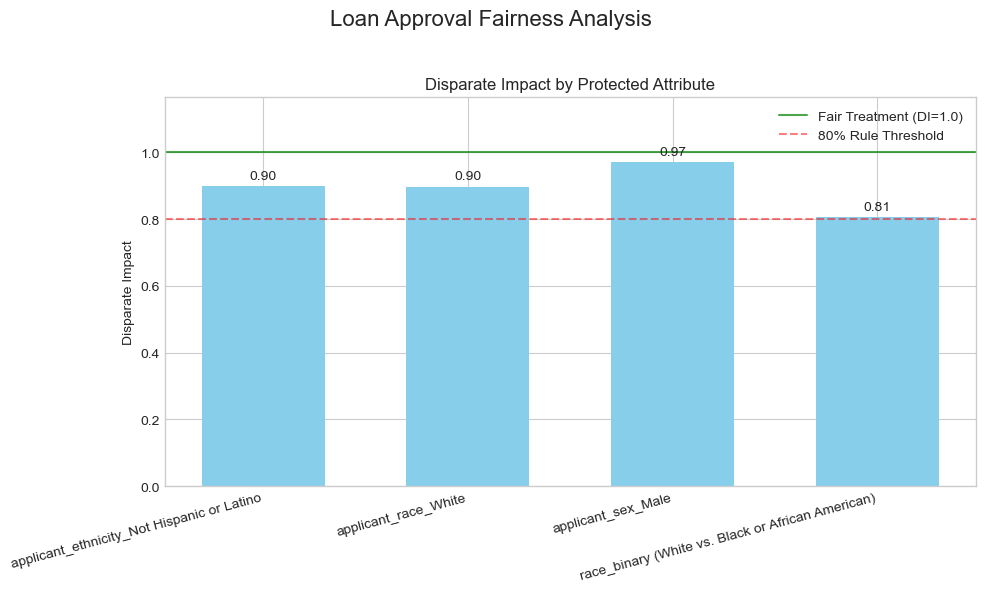

In [122]:
# The fairness results data
all_metrics = fairness_results 

print("\nGenerating visualizations...")

# Use a smaller figure size for a more compact chart
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Loan Approval Fairness Analysis', fontsize=16)

# Plot: Disparate Impact
attributes = [m['attribute'] for m in all_metrics]
di_values = [m['disparate_impact'] for m in all_metrics]
bars = ax.bar(attributes, di_values, color='skyblue', width=0.6)
ax.axhline(y=1.0, color='green', linestyle='-', alpha=0.7, label='Fair Treatment (DI=1.0)')
ax.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='80% Rule Threshold')
ax.axhline(y=1.2, color='red', linestyle='--', alpha=0.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('Disparate Impact')
ax.set_title('Disparate Impact by Protected Attribute')
ax.set_ylim(0, max(di_values) * 1.2)
ax.legend()

# Rotate x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=15, ha='right')

# Adjust layout for a more compact display (leaves room for the suptitle)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


In [123]:
def plot_base_rates(fairness_results, save_path=None):
    # Extract data for plotting
    attributes = [result['attribute'] for result in fairness_results]
    display_names = get_display_names(attributes)
    base_rates_priv = [result['base_rate_privileged'] * 100 for result in fairness_results]
    base_rates_unpriv = [result['base_rate_unprivileged'] * 100 for result in fairness_results]
    
    # Calculate differences for annotations
    differences = [priv - unpriv for priv, unpriv in zip(base_rates_priv, base_rates_unpriv)]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Set up x-positions for bars
    x_pos = np.arange(len(display_names))
    width = 0.35
    
    # Create bar colors with gradient
    priv_color = '#6929c4'
    unpriv_color = '#1192e8'
    
    # Plot bars
    bars1 = ax.bar(x_pos - width/2, base_rates_priv, width, label='Privileged Group', 
                  color=priv_color, alpha=0.8)
    bars2 = ax.bar(x_pos + width/2, base_rates_unpriv, width, label='Unprivileged Group', 
                  color=unpriv_color, alpha=0.8)
    
    # Add values on top of bars
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1,
               f"{base_rates_priv[i]:.1f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1,
               f"{base_rates_unpriv[i]:.1f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Add difference annotations between bars
    for i, diff in enumerate(differences):
        x_center = x_pos[i]
        y_pos = max(base_rates_priv[i], base_rates_unpriv[i]) + 5
        
        # Format the text with a sign
        if diff > 0:
            diff_text = f"+{diff:.1f}%"
            color = '#a83246'  # Red for positive difference (privileged > unprivileged)
        elif diff < 0:
            diff_text = f"{diff:.1f}%"
            color = '#3266a8'  # Blue for negative difference (privileged < unprivileged)
        else:
            diff_text = "No diff"
            color = 'green'
            
        ax.text(x_center, y_pos, diff_text, ha='center', va='bottom', 
               color=color, fontsize=10, fontweight='bold')
    
    # Set axis labels and title
    ax.set_title('Base Rates Comparison', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel('Percentage of Positive Outcomes (%)', fontsize=12, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(display_names, fontsize=11)
    
    # Set y-limits with some padding
    y_max = max(max(base_rates_priv), max(base_rates_unpriv)) * 1.2
    ax.set_ylim(0, y_max)
    
    # Add legend with better positioning
    ax.legend(fontsize=11, loc='upper right', framealpha=0.9)
    
  
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.08, 1, 0.98])
    
    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig




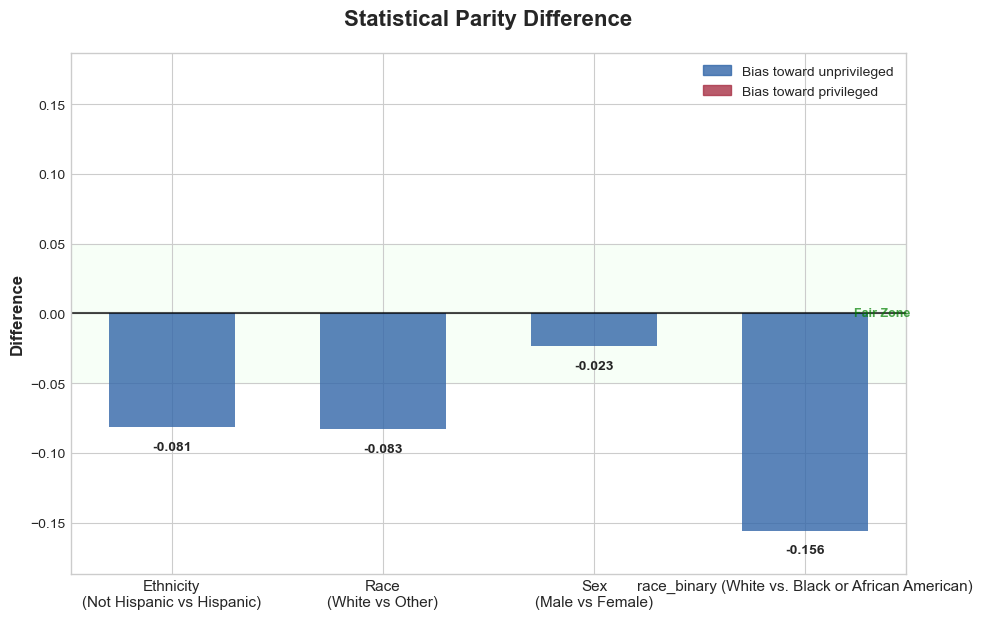

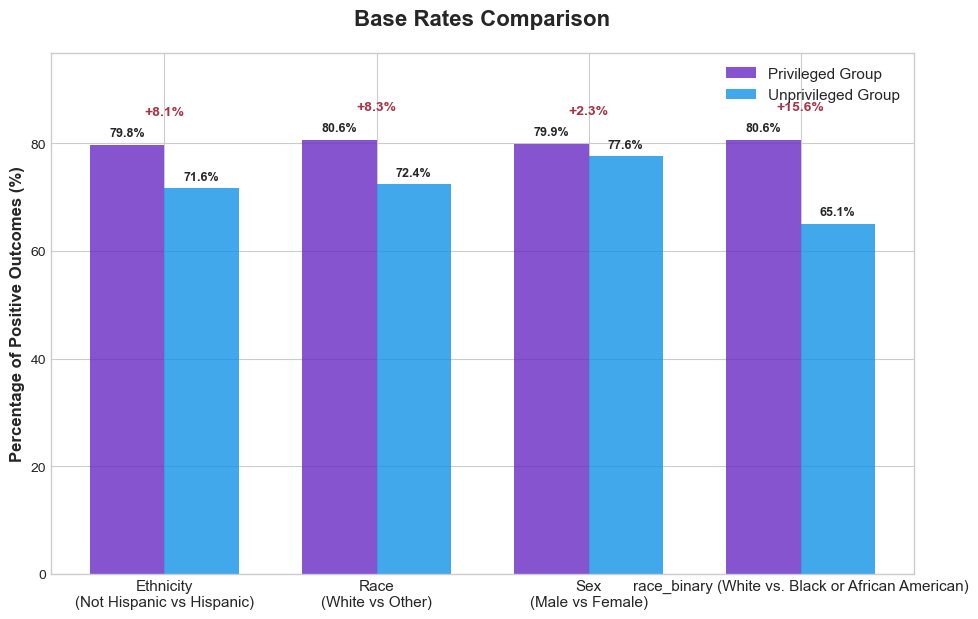

In [124]:
plot_statistical_parity(fairness_results)

plot_base_rates(fairness_results)
# Show all plots
plt.show()

In [125]:
import pandas as pd
import numpy as np
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import BinaryLabelDatasetMetric

# Using the existing dataframe df_pairwise
# Create a clean copy to work with
df_copy = df_pairwise.copy()

# Prepare the dataset for AIF360
X = df_copy.drop(['id','loan_status', 'race_binary'], axis=1)  # Features
y = df_copy['loan_status']  # Target (loan approval status)
protected = df_copy['race_binary']  # Protected attribute

# Create AIF360 dataset
aif_dataset = BinaryLabelDataset(
    df=pd.concat([X, protected, y], axis=1),
    label_names=['loan_status'],
    protected_attribute_names=['race_binary'],
    privileged_protected_attributes=[1],  # White is privileged
    favorable_label=1,  # Accepted is favorable
    unfavorable_label=0  # Rejected is unfavorable
)

# Define privileged and unprivileged groups
privileged_groups = [{'race_binary': 1}]  # White applicants
unprivileged_groups = [{'race_binary': 0}]  # Black applicants

# Calculate original metrics
original_metrics = BinaryLabelDatasetMetric(
    aif_dataset,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

original_di = original_metrics.disparate_impact()
original_spd = original_metrics.statistical_parity_difference()


print("=== Original Metrics ===")
print(f"Statistical Parity Difference: {original_spd:.4f}")
print(f"Disparate Impact: {original_di:.4f}")

print("=" * 50)

# Apply Reweighing
RW = Reweighing(unprivileged_groups=unprivileged_groups, 
                privileged_groups=privileged_groups)
dataset_transformed = RW.fit_transform(aif_dataset)

# Calculate metrics after transformation
transformed_metrics = BinaryLabelDatasetMetric(
    dataset_transformed,
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups
)

transformed_di = transformed_metrics.disparate_impact()
transformed_spd = transformed_metrics.statistical_parity_difference()


print("\n=== After Reweighing ===")
print(f"Statistical Parity Difference: {transformed_spd:.4f}")
print(f"Disparate Impact: {transformed_di:.4f}")


weights = dataset_transformed.instance_weights

df_pairwise_copy = df_pairwise.copy()
df_pairwise_copy['fairness_weight'] = weights

# Creates a mapping from ID to weight
id_weight_map = df_pairwise_copy[['id', 'fairness_weight']].copy()

# Creates a full weights DataFrame for ALL records
# Starts with all IDs from the original full dataset
all_ids_df = df[['id']].copy()

# Merges with the weights where available (Black/White applicants)
full_weights_df = all_ids_df.merge(id_weight_map, on='id', how='left')

# Fills missing weights with 1.0 for non-Black/White applicants
full_weights_df['fairness_weight'] = full_weights_df['fairness_weight'].fillna(1.0)

# Step 7: Verify the results
n_black_white = len(df_pairwise)
n_other = len(df) - n_black_white
n_weighted = (full_weights_df['fairness_weight'] != 1.0).sum()

print("\n=== Verification ===")
print(f"Total records: {len(df)}")
print(f"Black/White records (should have custom weights): {n_black_white}")
print(f"Other race records (should have weight=1.0): {n_other}")
print(f"Records with calculated weights: {n_weighted}")
print(f"Records with default weight=1.0: {(full_weights_df['fairness_weight'] == 1.0).sum()}")



white_indices = dataset_transformed.protected_attributes[:, 0] == 1
black_indices = dataset_transformed.protected_attributes[:, 0] == 0
approved_indices = dataset_transformed.labels.flatten() == 1
rejected_indices = dataset_transformed.labels.flatten() == 0

print("\n=== Weight Distribution ===")
print(f"White approved: avg weight = {weights[white_indices & approved_indices].mean():.4f}")
print(f"White rejected: avg weight = {weights[white_indices & rejected_indices].mean():.4f}")
print(f"Black approved: avg weight = {weights[black_indices & approved_indices].mean():.4f}")
print(f"Black rejected: avg weight = {weights[black_indices & rejected_indices].mean():.4f}")


=== Original Metrics ===
Statistical Parity Difference: -0.1556
Disparate Impact: 0.8070

=== After Reweighing ===
Statistical Parity Difference: -0.0000
Disparate Impact: 1.0000

=== Verification ===
Total records: 179457
Black/White records (should have custom weights): 160297
Other race records (should have weight=1.0): 19160
Records with calculated weights: 160297
Records with default weight=1.0: 19160

=== Weight Distribution ===
White approved: avg weight = 0.9824
White rejected: avg weight = 1.0732
Black approved: avg weight = 1.2174
Black rejected: avg weight = 0.5949


In [126]:
weights = full_weights_df[['fairness_weight']].copy()
#weights.to_csv('fairness_weights.csv', index=False)

In [103]:
print(X_train.shape)
print(y_train.shape)
print(df.shape)


(179457, 40)
(179457, 1)
(179457, 42)


In [6]:
import pandas as pd

# Load fairness weights
fairness_weights_df = pd.read_csv('data/weights/fairness_weights.csv')
fairness_weights = fairness_weights_df['fairness_weight'].values

print(fairness_weights_df.head(4))

   fairness_weight
0         0.982428
1         1.073192
2         0.982428
3         1.073192


In [106]:

total_samples = len(y_train)
rejected_samples = (y_train['loan_status'] == 0).sum()
approved_samples = (y_train['loan_status'] == 1).sum()

print("rejected samples:",rejected_samples)
print("Approved samples:", approved_samples)
rejected_adjustment = total_samples / (2 * rejected_samples)
approved_adjustment = total_samples / (2 * approved_samples)

print(f"Class balance adjustment factors:")
print(f"- Rejected loans (0): {rejected_adjustment:.4f}")
print(f"- Approved loans (1): {approved_adjustment:.4f}")

# 3. Create a mapping dictionary for the adjustments
adjustment_map = {0: rejected_adjustment, 1: approved_adjustment}

# 4. Apply the adjustment to the fairness weights
# Assuming fairness_weights and y_train are in the same order
class_adjustments = y_train['loan_status'].map(adjustment_map).values
adjusted_weights = fairness_weights * class_adjustments

# 5. Save the adjusted weights
adjusted_fairness_weights_df = pd.DataFrame({'fairness_weight': adjusted_weights})
adjusted_fairness_weights_df.to_csv('fairness_weights_adjusted.csv', index=False)

print("Adjusted weights saved to 'fairness_weights_adjusted.csv'")

# 6. Show a preview of the adjusted weights
print(adjusted_fairness_weights_df.head(4))

rejected samples: 37533
Approved samples: 141924
Class balance adjustment factors:
- Rejected loans (0): 2.3907
- Approved loans (1): 0.6322
Adjusted weights saved to 'fairness_weights_adjusted.csv'
   fairness_weight
0         0.621120
1         2.565632
2         0.621120
3         2.565632


1    141924
0     37533
Name: loan_status, dtype: int64


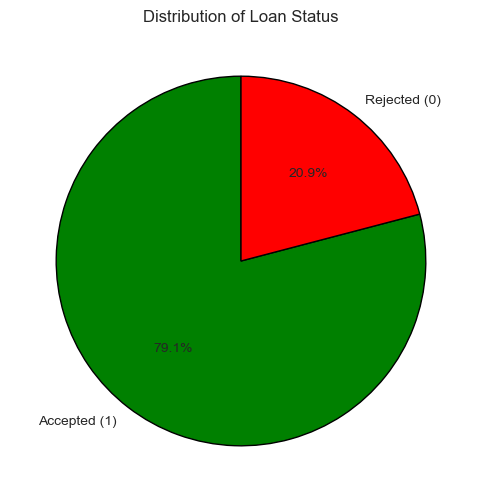

In [93]:
# Check distribution of loan status
loan_status_counts = df['loan_status'].value_counts()

# Print distribution
print(loan_status_counts)

# Plot pie chart
plt.figure(figsize=(6,6))
loan_status_counts.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['green', 'red'], 
    labels=['Accepted (1)', 'Rejected (0)'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.ylabel("")  # Remove y-axis label
plt.title("Distribution of Loan Status")
plt.show()